## Building models on the data, which is saved after categorical embedding, standardization and onehot encoding.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

!pip install xgboost
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV

     |████████████████████████████████| 157.5 MB 86 kB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!ls /datasets/final_hack

demand_supply_25k.csv  test_Embed_10L.csv    X_test_Embed_75K.csv
demand_supply.xlsx     test_Embed_1L.csv     X_train_Embed_10L.csv
ing_w_demand.xlsx      test_Embed_25K.csv    X_train_Embed_1L.csv
Predictions	       test_Embed_75K.csv    X_train_Embed_25K.csv
rfr_strategy_25K.csv   X_test_Embed_10L.csv  X_train_Embed_75K.csv
rfr_strategy_75K.csv   X_test_Embed_1L.csv
Strategy_25K.ipynb     X_test_Embed_25K.csv


In [ ]:
X_train = pd.read_csv('/datasets/final_hack/X_train_Embed_25K.csv')

In [ ]:
X_train.head()

,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,fid1,fid2,fid3,...,month4,month5,month6,month7,month8,month9,month10,month11,month12,yield
0,-0.062836,-0.601137,-1.453752,-0.269658,0.514847,-0.182551,1.022931,-0.128192,0.127298,-0.518082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,54.80
1,-0.062836,0.980151,-1.544085,1.481196,0.006072,-0.182551,-1.492852,-0.128192,0.127298,-0.518082,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,178.02
2,-0.062836,0.212358,0.081899,0.438553,0.484919,-0.182551,0.096064,-0.128192,0.127298,-0.518082,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,167.08
3,-0.062836,-0.701681,1.707883,-0.761471,0.496891,-0.182551,1.243614,-0.128192,0.127298,-0.518082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.28
4,-0.062836,-1.359789,-1.544085,-1.145085,0.472947,-0.182551,-1.492852,-0.128192,0.127298,-0.518082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.84


In [ ]:
X_train.shape

(15383473, 38)

In [ ]:
X_test = pd.read_csv('/datasets/final_hack/X_test_Embed_25K.csv')
X_test.head()

,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,fid1,fid2,fid3,...,month4,month5,month6,month7,month8,month9,month10,month11,month12,yield
0,-0.522355,-0.390908,-0.098766,-0.486055,0.329292,-0.182551,-0.565984,0.435717,0.084611,-1.129270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,61.72
1,-0.522355,-0.445750,-1.273088,0.163138,0.059940,-0.326697,0.537429,0.435717,0.084611,-1.129270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.98
2,-0.522355,1.894190,0.985223,1.372997,0.221552,-0.182551,0.537429,0.435717,0.084611,-1.129270,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,177.85
3,-0.813962,1.894190,0.985223,1.372997,0.221552,-0.182551,0.537429,1.712354,-1.727743,-0.303305,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23.22
4,-0.813962,-0.445750,-1.273088,0.163138,0.059940,-0.326697,0.537429,1.712354,-1.727743,-0.303305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.09


In [ ]:
X_test.shape

(5127825, 38)

In [ ]:
y_train = X_train['yield']
y_test = X_test['yield']

In [ ]:
train_values = y_train.values
test_values = y_test.values

In [ ]:
y_train.head()

0     54.80
1    178.02
2    167.08
3     73.28
4     92.84
Name: yield, dtype: float64

In [ ]:
train_values

array([ 54.8   , 178.02  , 167.08  , ...,   4.875 ,  48.99  ,  79.3425])

In [ ]:
X_train.drop(['yield'], axis = 1, inplace = True)
X_test.drop(['yield'], axis = 1, inplace = True)

In [ ]:
X_train.head()

,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,fid1,fid2,fid3,...,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
0,-0.062836,-0.601137,-1.453752,-0.269658,0.514847,-0.182551,1.022931,-0.128192,0.127298,-0.518082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.062836,0.980151,-1.544085,1.481196,0.006072,-0.182551,-1.492852,-0.128192,0.127298,-0.518082,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.062836,0.212358,0.081899,0.438553,0.484919,-0.182551,0.096064,-0.128192,0.127298,-0.518082,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.062836,-0.701681,1.707883,-0.761471,0.496891,-0.182551,1.243614,-0.128192,0.127298,-0.518082,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.062836,-1.359789,-1.544085,-1.145085,0.472947,-0.182551,-1.492852,-0.128192,0.127298,-0.518082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scores = pd.DataFrame(columns=['Model','R-Square','Train_MSE','Test_MSE','Train_RMSE','Test_RMSE','Train_MAE','Test_MAE'])
scores

,Model,R-Square,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE


In [ ]:
def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description, df):
    r_square = r2_score(train_actual,train_predicted)
    
    print(f'R Square: {r_square}')
    
    train_mse = round(mean_squared_error(train_actual,train_predicted),3)
    test_mse = round(mean_squared_error(test_actual,test_predicted),3)
    
    train_rmse = round(mean_squared_error(train_actual,train_predicted,squared=False),3)
    test_rmse = round(mean_squared_error(test_actual,test_predicted,squared=False),3)
    
    print(f'Train RMSE: {train_rmse}')
    print(f'Test RMSE: {test_rmse}')


    train_mae = round(mean_absolute_error(train_actual,train_predicted),3)
    test_mae = round(mean_absolute_error(test_actual,test_predicted),3)
    
        
    df = df.append(pd.Series([model_description, r_square, train_mse, test_mse, train_rmse, test_rmse, train_mae, test_mae],\
     index = scores.columns),ignore_index=True)
    
    return df

### Building Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
train_predicted = lm.predict(X_train)
test_predicted = lm.predict(X_test)

In [ ]:
scores = get_metrics(train_values, train_predicted, test_values, test_predicted, "LR", scores)
scores

R Square: 0.2283372125126517
Train RMSE: 1340.937
Test RMSE: 1344.138


,Model,R-Square,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE
0,LR,0.228337,1798111.452,1806706.015,1340.937,1344.138,565.725,566.191


### Building Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=10, criterion= 'mse', random_state= 340, ccp_alpha= 1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=1, max_depth=10, random_state=340)

In [ ]:
train_predicted = dtr.predict(X_train)
test_predicted = dtr.predict(X_test)

In [ ]:
scores = get_metrics(train_values, train_predicted, test_values, test_predicted, "DTR", scores)
scores

R Square: 0.8507869301695145
Train RMSE: 589.655
Test RMSE: 594.42


,Model,R-Square,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE
0,LR,0.228337,1798111.452,1806706.015,1340.937,1344.138,565.725,566.191
1,DTR,0.850787,347692.974,353335.311,589.655,594.420,168.844,169.385


In [ ]:
dtr.get_params()

{'ccp_alpha': 1,
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 340,
 'splitter': 'best'}

### Feature importances
* The importances of a feature are calculated based on the reduction in the impurity (information gain), when that feature is used at a node to split the data.

In [ ]:
features = X_train.columns
importances = dtr.feature_importances_

indices = np.argsort(importances)[::-1]

pd.DataFrame([X_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,fid1,ing_y,fid2,fc1,fid4,temp_obs,Loc1,ing_w,fid3,Loc2,...,month8,ing_z,wind_direction,pressure_sea_level,cloud1,wind_speed,month2,month7,cloud2,month1
1,0.156341,0.154797,0.148539,0.121358,0.093392,0.078904,0.071206,0.06867,0.027141,0.014922,...,0.000368,0.000354,0.000259,0.000234,0.000141,0.000121,0.000062,0.00003,0.000001,0.0


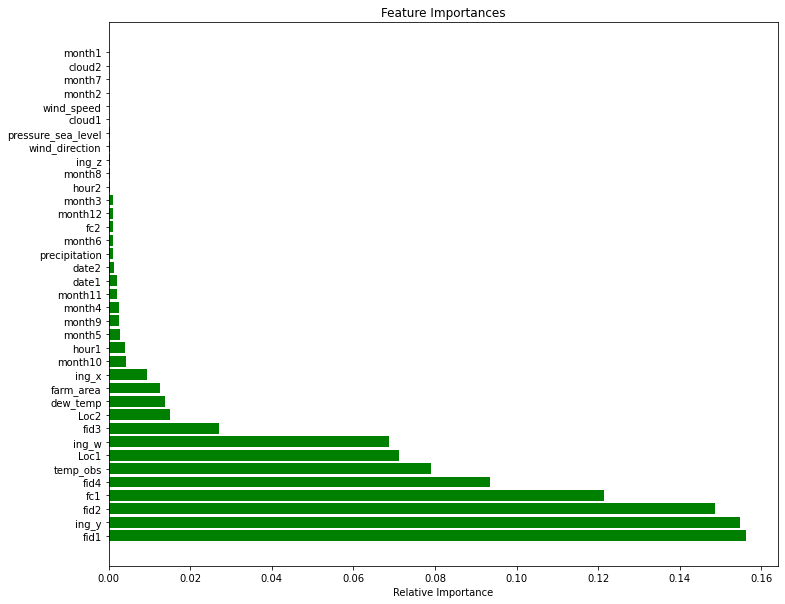

In [ ]:
plt.figure(figsize = (12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
import pickle
pkl_filename = "/work/Model_Building/dtr_model_25K.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(dtr, file)

### Building RandomForests

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=8, criterion= 'mse', max_depth= 12, ccp_alpha= 1.5,\
                             random_state= 340)

rfr.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=1.5, max_depth=12, n_estimators=8,
                      random_state=340)

In [ ]:
train_predicted = rfr.predict(X_train)
test_predicted = rfr.predict(X_test)

In [ ]:
scores = get_metrics(train_values, train_predicted, test_values, test_predicted, "RFR", scores)
scores

R Square: 0.9005628106323151
Train RMSE: 481.359
Test RMSE: 491.835


,Model,R-Square,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE
0,LR,0.228337,1798111.452,1806706.015,1340.937,1344.138,565.725,566.191
1,DTR,0.850787,347692.974,353335.311,589.655,594.420,168.844,169.385
2,RFR,0.900563,231706.325,241901.968,481.359,491.835,134.887,135.925


In [ ]:
import pickle
pkl_filename = "/work/Model_Building/rfr_model_25K.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rfr, file)

In [ ]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 1.5,
 'criterion': 'mse',
 'max_depth': 12,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 8,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 340,
 'verbose': 0,
 'warm_start': False}

In [ ]:
features = X_train.columns
importances = rfr.feature_importances_

indices = np.argsort(importances)[::-1]

pd.DataFrame([X_train.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,ing_y,fid2,fid1,fc1,fid4,temp_obs,Loc1,ing_w,fid3,farm_area,...,month8,precipitation,hour2,wind_direction,month1,month7,wind_speed,cloud1,month2,cloud2
1,0.17393,0.152033,0.13571,0.115877,0.094446,0.08103,0.065376,0.039548,0.034157,0.015902,...,0.00119,0.001182,0.001063,0.000636,0.000561,0.000422,0.000252,0.000186,0.000123,0.000092


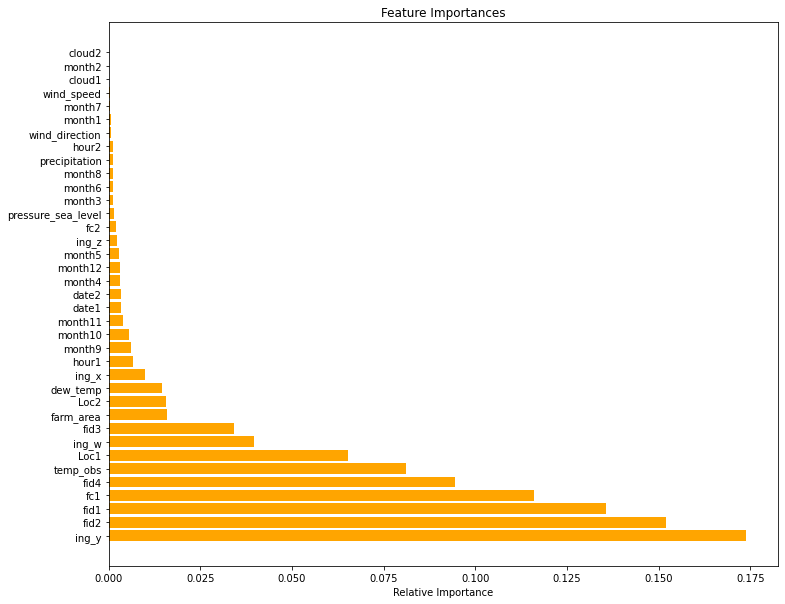

In [ ]:
plt.figure(figsize = (12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### <font color= 'red'>Here we can observe that <u>fid features</u> (categorical embeddings of farm_ids), one hot vector of <u>ing_y, ing_w, temperature_observations feature, farming_company, deidentified_location</u> are relatively important in predicting the yield.</font>

In [ ]:
scores

,Model,R-Square,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE
0,LR,0.228337,1798111.452,1806706.015,1340.937,1344.138,565.725,566.191
1,DTR,0.850787,347692.974,353335.311,589.655,594.420,168.844,169.385
2,RFR,0.900563,231706.325,241901.968,481.359,491.835,134.887,135.925


### Building XGBoost Regressor

In [ ]:
xgbr = XGBRegressor(n_estimators=50, learning_rate=0.1, gamma=1, subsample=0.8)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [ ]:
train_predicted = xgbr.predict(X_train)
test_predicted = xgbr.predict(X_test)

In [ ]:
scores = get_metrics(train_values, train_predicted, test_values, test_predicted, "XGBR", scores)
scores

R Square: 0.8385426101312358
Train RMSE: 613.371
Test RMSE: 613.095


,Model,R-Square,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE
0,LR,0.228337,1798111.452,1806706.015,1340.937,1344.138,565.725,566.191
1,DTR,0.850787,347692.974,353335.311,589.655,594.420,168.844,169.385
2,RFR,0.900563,231706.325,241901.968,481.359,491.835,134.887,135.925
3,XGBR,0.838543,376224.416,375885.813,613.371,613.095,181.780,181.838


In [ ]:
train_predicted_xg = pd.DataFrame({'yield': train_predicted})
train_predicted_xg.head()

,yield
0,115.960236
1,143.506454
2,117.590714
3,115.960236
4,126.817276


In [ ]:
train_predicted_xg[train_predicted_xg['yield'] < 0].shape

(293973, 1)

In [ ]:
train_predicted_xg[train_predicted_xg['yield'] < 0].head()

,yield
913,-22.399529
919,-16.156185
1897,-16.349125
1925,-25.824253
1929,-4.588905


**Gradient boosting techinques work on residuals, if the observations which are having yield as 0 are in the same leaf as another observation which has an actual yeild of 100, but predicted as 1000, then there will be subtraction of a value even from the observations having yield 0, due to which they get negative value.**